# Test de la nouvelle classe TimeProblem sans saut de propriétés

In [1]:
import sys
import os
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path
savefig_path = os.path.join(lib_path, "figures/")
save_fig = False

In [2]:
from src.main_discontinu import *
from src.plot_fields import *
from src.time_problem import *
from src.plot_stats import *

%matplotlib inline
rc("figure", figsize=(10, 5))
rc("figure", dpi=100)
rc("font", size=18)
rc("legend", fontsize=16)
# rc("animation", bitrate=80)
rc("text.latex", preamble=r"\usepackage{siunitx}")

## Test des 3 opérateurs à maillage constant

Ici on va réaliser une simulation sans saut de propriété avec différents opérateurs de convection.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
n_lim = 10**8
t_fin_lim = 0.02

In [4]:
# d = 6./100*Delta/2.
# dx = 0.06 / 25.6 * 0.02
dx = 0.02 / 512
dx_fin = 0.06 / 60.0 * 0.02
cfl = 0.5

phy_prop_conv = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=5.5 * 10**-2,
    rho_cp1=7.03 * 10**4,
    rho_cp2=7.03 * 10**4,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_no_conv = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=5.5 * 10**-2,
    rho_cp1=7.03 * 10**4,
    rho_cp2=7.03 * 10**4,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop_ref = NumericalProperties(
    dx=dx_fin,
    schema="weno",
    time_scheme="rk3",
    phy_prop=phy_prop_no_conv,
    cfl=cfl,
    fo=0.5,
)
num_prop_weno = NumericalProperties(
    dx=dx,
    schema="weno",
    time_scheme="rk3",
    phy_prop=phy_prop_conv,
    cfl=cfl,
    fo=0.5,
)
num_prop_quick = NumericalProperties(
    dx=dx,
    schema="quick",
    time_scheme="rk3",
    phy_prop=phy_prop_conv,
    cfl=cfl,
    fo=0.5,
)
num_prop_upwind = NumericalProperties(
    dx=dx,
    schema="upwind",
    time_scheme="rk3",
    phy_prop=phy_prop_conv,
    cfl=cfl,
    fo=0.5,
)
# markers = Bulles(phy_prop=phy_prop_conv, x=num_prop.x, n_bulle=1)
markers = Bulles(phy_prop=phy_prop_conv, n_bulle=1)

print("dx : ", num_prop_quick.dx)

dx :  3.90625e-05



TOF
===
dt fourier
0.00025614840429655244
Db / dx = 59
Monofluid convection :  weno

TOF
===
dt cfl
9.765624999999999e-05
Db / dx = 30
Monofluid convection :  weno

TOF
===
dt cfl
9.765624999999999e-05
Db / dx = 30
Monofluid convection :  quick

TOF
===
dt cfl
9.765624999999999e-05
Db / dx = 30
Monofluid convection :  upwind

Nombre de frames :  20


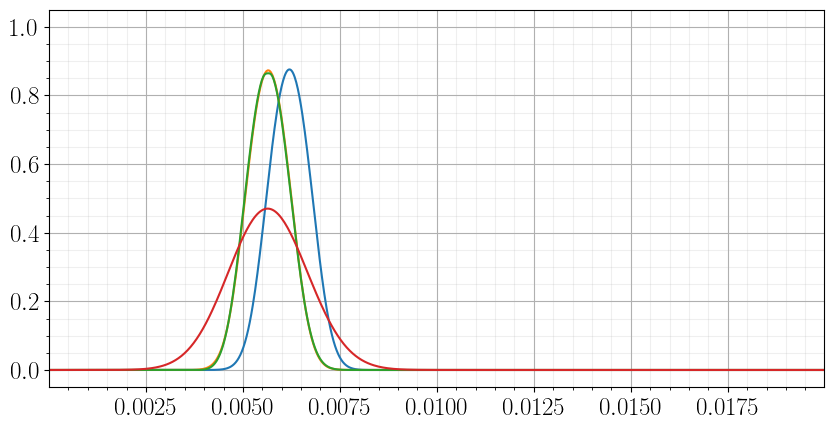

In [5]:
prob_clean_weno_ref = TimeProblem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_no_conv,
    num_prop=num_prop_ref,
    plotter=[],
)
prob_clean_weno = TimeProblem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_conv,
    num_prop=num_prop_weno,
    plotter=[],
)
prob_clean_quick = TimeProblem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_conv,
    num_prop=num_prop_quick,
    plotter=[],
)
prob_clean_upwind = TimeProblem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_conv,
    num_prop=num_prop_upwind,
    plotter=[],
)

list_prob = [prob_clean_weno_ref, prob_clean_weno, prob_clean_quick, prob_clean_upwind]

fig, ax = plt.subplots()
n_parcours_domaine = 1
# n_frame = int(n_parcours_domaine * phy_prop_conv.Delta / phy_prop_conv.v / up.dt) + 1
n_frame = 20
dt_max = max([pb.dt for pb in list_prob])
n_dt_per_frame = max(
    int(n_parcours_domaine * phy_prop_conv.Delta / phy_prop_conv.v / dt_max / n_frame)
    + 1,
    1,
)
up = Compare(list_prob, ax, ylim=(-0.05, 1.05), n_dt_per_frame=n_dt_per_frame)
print()
print("Nombre de frames : ", n_frame)
# anim = FuncAnimation(
#     fig,
#     up,
#     frames=n_frame,
#     interval=100,
#     blit=True,
#     repeat=False,
#     cache_frame_data=False,
# )
# HTML(anim.to_jshtml())
for i in range(n_frame):
    up(i)

In [6]:
# t_fin = 10.0

# prob_clean_weno_ref = TimeProblem(
#     get_T_creneau, markers=markers, phy_prop=phy_prop_no_conv, num_prop=num_prop_ref
# )
# t, e = prob_clean_weno_ref.timestep(
#     t_fin=min(t_fin, t_fin_lim),
#     n=n_lim,
#     number_of_plots=1,
#     plotter=Plotter("classic", ispretty=True),
# )
# prob_clean_weno = TimeProblem(
#     get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_weno
# )
# t, e = prob_clean_weno.timestep(
#     t_fin=min(t_fin, t_fin_lim),
#     n=n_lim,
#     number_of_plots=1,
#     plotter=Plotter("classic", ispretty=True),
# )

# prob_clean_quick = TimeProblem(
#     get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_quick
# )
# t, e = prob_clean_quick.timestep(
#     t_fin=min(t_fin, t_fin_lim),
#     n=n_lim,
#     number_of_plots=1,
#     plotter=Plotter("classic", ispretty=True),
# )

# prob_clean_upwind = TimeProblem(
#     get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_upwind
# )
# t, e = prob_clean_upwind.timestep(
#     t_fin=min(t_fin, t_fin_lim),
#     n=n_lim,
#     number_of_plots=1,
#     plotter=Plotter("classic", ispretty=True),
# )

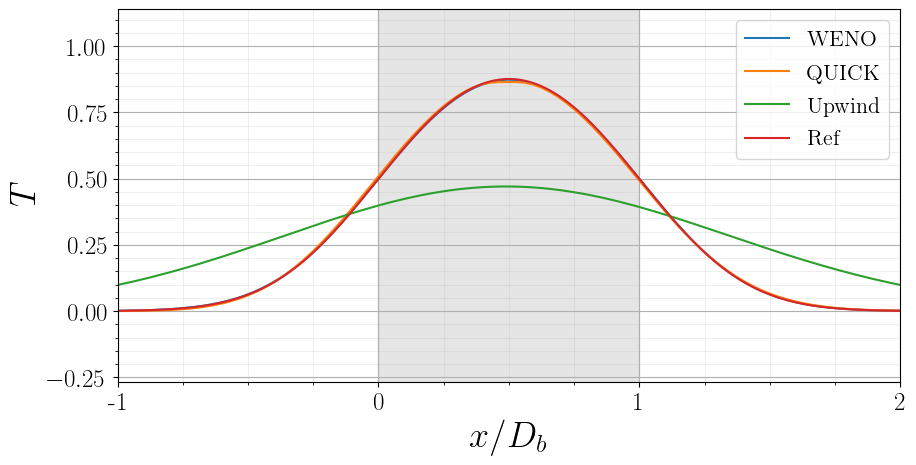

In [7]:
plot = Plotter("decale", ispretty=True, zoom=(-1.0, 2.0))
plot.plot(prob_clean_weno.problem_state, label="WENO")
plot.plot(prob_clean_quick.problem_state, label="QUICK")
plot.plot(prob_clean_upwind.problem_state, label="Upwind")
plot.plot(prob_clean_weno_ref.problem_state, label="Ref")
# plot.ax.set_ylim(0.1,0.4)
if save_fig:
    plot.fig.savefig(os.path.join(os.getcwd(), "../figures/sans_saut/profil_T.pdf"))


WENO
====
dE*/dt* = 0

QUICK
=====
dE*/dt* = -2.58009e-19

Upwind
dE*/dt* = 5.16019e-19


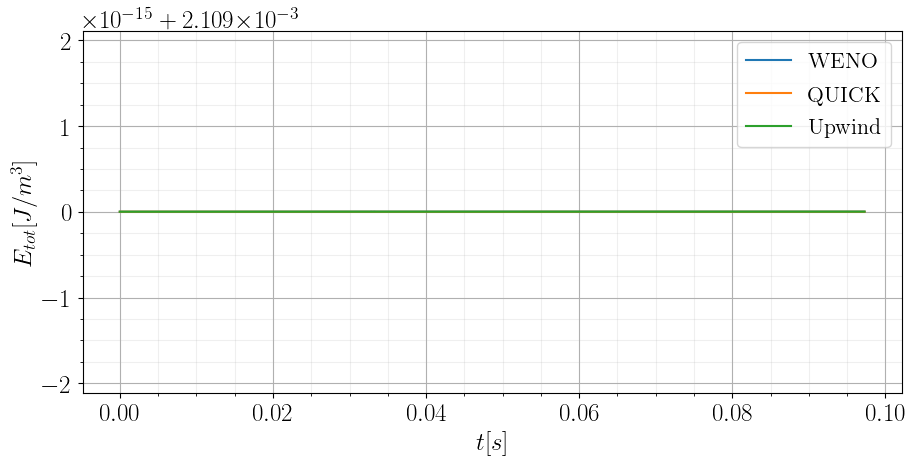

In [8]:
plot_en = EnergiePlot()
plot_en.plot_tpb(prob_clean_weno, label="WENO")
plot_en.plot_tpb(prob_clean_quick, label="QUICK")
plot_en.plot_tpb(prob_clean_upwind, label="Upwind")
if save_fig:
    plot_en.fig.savefig(os.path.join(os.getcwd(), "../figures/sans_saut/E_f_t.pdf"))

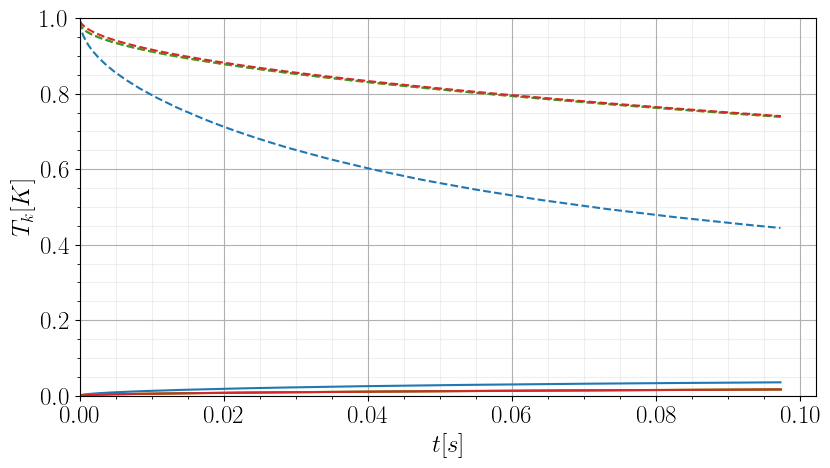

In [9]:
plot_T = TemperaturePlot()
plot_T.plot_tpb(prob_clean_upwind, label=" Upwind")
plot_T.plot_tpb(prob_clean_quick, label=" QUICK")
plot_T.plot_tpb(prob_clean_weno, label=" WENO")
plot_T.plot_tpb(prob_clean_weno_ref, label=" Ref")
plot_T.ax.set_xlim(0, None)
plot_T.ax.set_ylim(0, 1)
# plot_T.fig.canvas.draw_idle()
# plot_T.fig.show()
# # plt.show()
# labels = plot_T.ax.get_yticklabels(minor=False)
# ticks = list(plot_T.ax.get_yticks(minor=False))
# ticks.append(plot_T.T_final)
# labels.append(r"$T_f$")
# plot_T.ax.set_yticks(ticks, minor=False)
# plot_T.ax.set_yticklabels(labels, minor=False)

plot_T.add_T_final()
plot_T.legend_Tl_Tv()
plot_T.fig.tight_layout()
if save_fig:
    plot_T.fig.savefig(os.path.join(os.getcwd(), "../figures/sans_saut/Tl_Tv.pdf"))

In [10]:
def plot_dTdt(stat, plot, **args):
    dTdt = np.gradient(stat.Tv, stat.t)
    plot.ax.plot(stat.t, dTdt, **args)

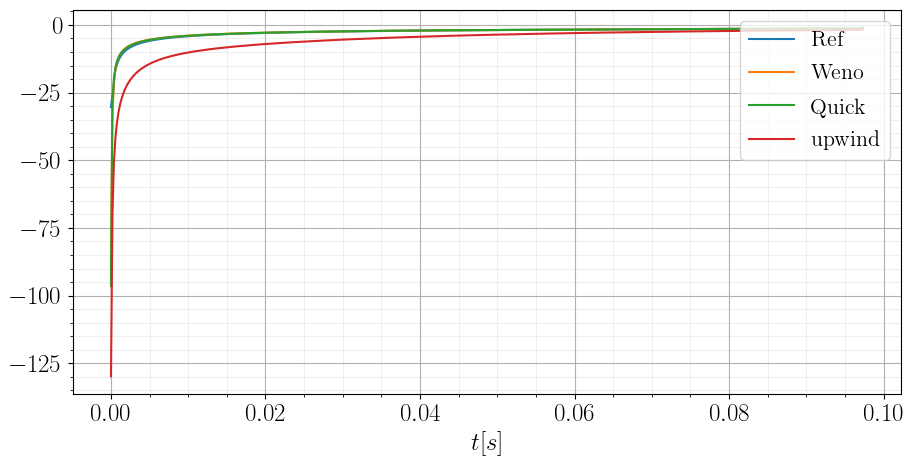

In [11]:
plot_dT = TimePlot()
plot_dTdt(prob_clean_weno_ref.stat, plot_dT, label="Ref")
plot_dTdt(prob_clean_weno.stat, plot_dT, label="Weno")
plot_dTdt(prob_clean_quick.stat, plot_dT, label="Quick")
plot_dTdt(prob_clean_upwind.stat, plot_dT, label="upwind")
le = plot_dT.ax.legend()
plot_dT.fig.tight_layout()

In [12]:
def plot_dTdtp(stat, plot, **args):
    dTdt = np.gradient(stat.Tv_pure, stat.t)
    plot.ax.plot(stat.t, dTdt, **args)

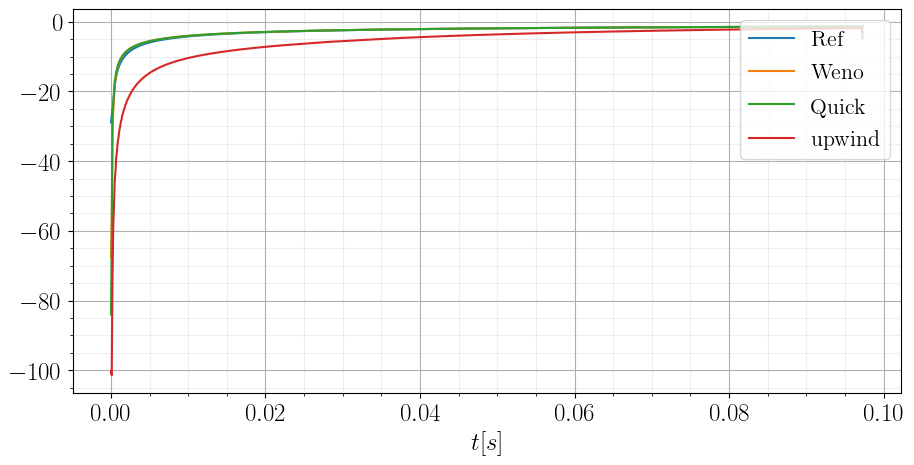

In [13]:
plot_dTp = TimePlot()
plot_dTdtp(prob_clean_weno_ref.stat, plot_dTp, label="Ref")
plot_dTdtp(prob_clean_weno.stat, plot_dTp, label="Weno")
plot_dTdtp(prob_clean_quick.stat, plot_dTp, label="Quick")
plot_dTdtp(prob_clean_upwind.stat, plot_dTp, label="upwind")
le = plot_dTp.ax.legend()
plot_dTp.fig.tight_layout()

In [14]:
def compute_nu(stat, phy_prop):
    dTdt = np.gradient(stat.Tl, stat.t)
    DeltaT = stat.Tv - stat.Tl
    nu = (
        phy_prop.rho_cp1
        * dTdt
        * phy_prop.Delta
        * phy_prop.alpha
        * 3.0
        / (phy_prop.lda1 * DeltaT)
    )
    return nu

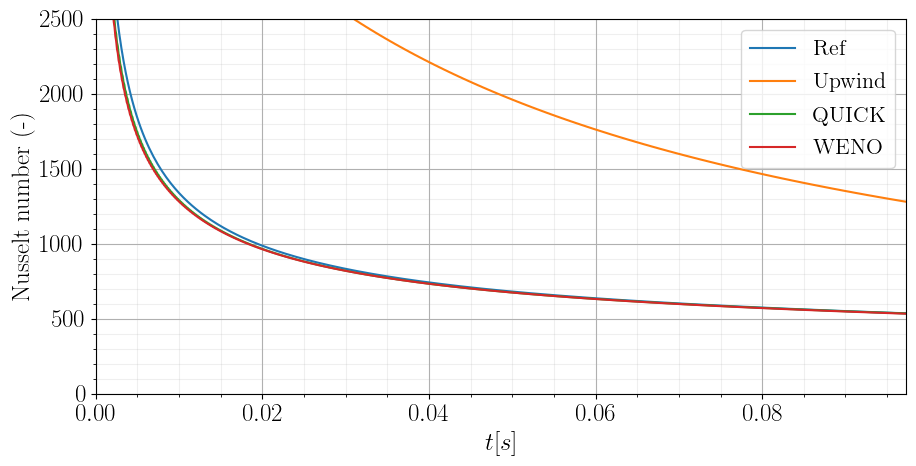

In [15]:
plot_Nu = TimePlot()
plot_Nu.ax.plot(
    prob_clean_weno_ref.stat.t,
    compute_nu(prob_clean_weno_ref.stat, phy_prop_no_conv),
    label=r"Ref",
)
plot_Nu.ax.plot(
    prob_clean_upwind.stat.t[:-1],
    compute_nu(prob_clean_upwind.stat, phy_prop_conv)[:-1],
    label=r"Upwind",
)
plot_Nu.ax.plot(
    prob_clean_quick.stat.t[:-1],
    compute_nu(prob_clean_quick.stat, phy_prop_conv)[:-1],
    label=r"QUICK",
)
plot_Nu.ax.plot(
    prob_clean_weno.stat.t[:-1],
    compute_nu(prob_clean_weno.stat, phy_prop_conv)[:-1],
    label=r"WENO",
)
plot_Nu.ax.legend()
plot_Nu.ax.set_ylim(0.0, 2500)
plot_Nu.ax.set_xlim(0.0, prob_clean_quick.problem_state.time)
plot_Nu.ax.set_ylabel(r"Nusselt number (-)")
plot_Nu.fig.tight_layout()

## Solution analytique du problème

### Définition

L'équation de la chaleur sans convection s'écrit :
$$ \frac{\partial T}{\partial t} = \frac{\lambda}{\rho C_p} \frac{\partial^2 T}{\partial x^2}.$$

Une solution $T_n(x, t) = f_n(t)g_n(x)$ s'écrit de la manière suivante :
$$ T_n(x, t) = e^{-t \frac{\lambda 4\pi^2 n^2}{\rho C_p L^2}}\left(A_n \cos{\left(2\pi n \frac{x}{L}\right)} + B_n \sin{\left(2\pi n \frac{x}{L}\right)}\right).$$

La solution générale s'écrit donc
$$ T(x, t) = a_0 + \sum_{n=1}^{\infty}{T_n(x, t)}.$$

In [16]:
def compute_a_n_creneau(n, L, x0, x1):
    N = np.linspace(1, n, n)
    int_res = (
        2.0
        / L
        * (L / (2.0 * np.pi * N))
        * (np.sin(2.0 * np.pi * N * x1 / L) - np.sin(2.0 * np.pi * N * x0 / L))
    )
    return int_res


def compute_b_n_creneau(n, L, x0, x1):
    N = np.linspace(1, n, n)
    int_res = (
        2.0
        / L
        * (L / (2.0 * np.pi * N))
        * (-np.cos(2.0 * np.pi * N * x1 / L) + np.cos(2.0 * np.pi * N * x0 / L))
    )
    return int_res


class TAnalytique:
    def __init__(self, n, L=1.0, x0=0.47, x1=0.53, lda_sur_rhocp=1.0):
        self.n = n
        self.an = compute_a_n_creneau(n, L, x0, x1)
        self.bn = compute_b_n_creneau(n, L, x0, x1)
        self.a0 = (x1 - x0) / L
        self.L = L
        self.x0 = x0
        self.x1 = x1
        self.N = np.linspace(1, n, n)
        self.lda = lda_sur_rhocp

    def __call__(self, x: float, t: float):
        Tn = np.exp(-t * self.lda * (2 * np.pi * self.N / self.L) ** 2) * (
            self.an * np.cos(2 * np.pi * self.N * x / self.L)
            + self.bn * np.sin(2 * np.pi * self.N * x / self.L)
        )
        return self.a0 + np.sum(Tn)

    def compute_mean_T_liq(self, t=0.0, k=10):
        xk = np.linspace(0.0, self.L, k)
        I = np.bitwise_or(xk < self.x0, xk > self.x1)
        T = np.array([self(x, t) for x in xk])
        return np.sum(I * T) / np.sum(I)

    def compute_mean_T_vap(self, t=0.0, k=10):
        xk = np.linspace(0.0, self.L, k)
        I = np.bitwise_and(xk > self.x0, xk < self.x1)
        T = np.array([self(x, t) for x in xk])
        return np.sum(I * T) / np.sum(I)

In [17]:
T_ref = TAnalytique(
    50000,
    markers.Delta,
    markers.markers[0, 0],
    markers.markers[0, 1],
    lda_sur_rhocp=5.5 * 10**-2 / (7.03 * 10**4),
)

[  0.           0.           5.26315789  10.52631579  15.78947368
  21.05263158  26.31578947  31.57894737  36.84210526  42.10526316
  47.36842105  52.63157895  57.89473684  63.15789474  68.42105263
  73.68421053  78.94736842  84.21052632  89.47368421  94.73684211
 100.        ]


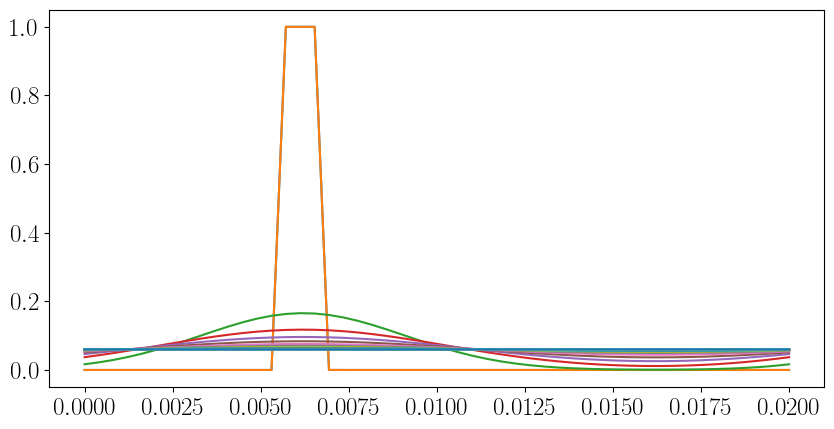

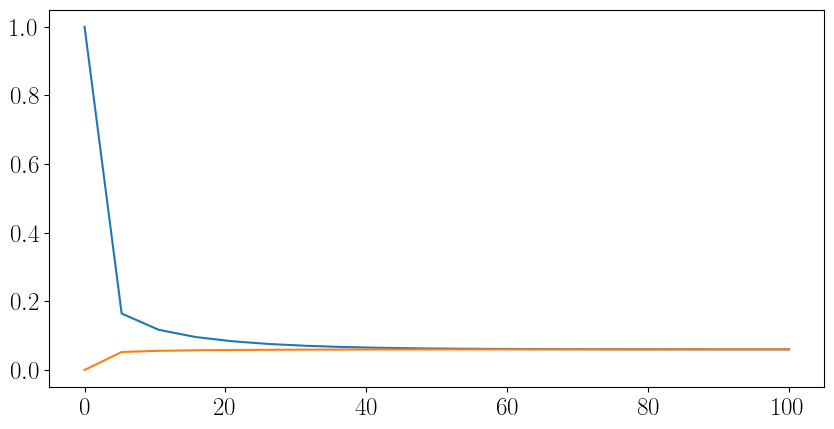

In [18]:
# import matplotlib.pyplot as plt
# from matplotlib import rc
# %matplotlib widget
# rc('figure', figsize=(10,5), dpi=120)
plt.figure()

nk = 50
nt = 20
xl = np.linspace(0.0, markers.Delta, nk)
# tl = np.logspace(-2, 2,nt)
tl = np.linspace(0.0, 100.0, nt)
tl = np.r_[0.0, tl]
print(tl)
Tliq = []
Tvap = []
for t in tl:
    Tl = [T_ref(x, t) for x in xl]
    tliq = T_ref.compute_mean_T_liq(t, nk)
    Tliq.append(tliq)
    tvap = T_ref.compute_mean_T_vap(t, nk)
    Tvap.append(tvap)
    # print(tliq)
    plt.plot(xl, Tl)
plt.figure()
toto = plt.plot(tl, Tvap, label=r"$T_v$")
toto = plt.plot(tl, Tliq, label=r"$T_l$")

### Étude de convergence

Cette solution numérique du nombre de Nusselt en fonction du temps converge selon 3 paramètres :
- $n_n$ le nombre de modes de fourier pris en compte
- $n_t$ le nombre de pas de temps sur l'interval, déterminant la précision de la dérivée
- $n_k$ la discrétisation spatiale de la solution, déterminant la précision des intégrales $T_l$ et $T_v$

Nous allons tour à tour évaluer la convergence de la solution en fonction de chacun de ces trois paramètres, en utilisant une valeur qui correspond à la solution convergée retenue pour les 2 autres paramètres.

In [19]:
def compute_Nu(tl, Tliq, Tvap, phy_prop):
    Tliq = np.array(Tliq)
    Tvap = np.array(Tvap)
    dTldt = np.gradient(Tliq, tl)
    DeltaT = Tvap - Tliq
    Nu_ref = (
        phy_prop.rho_cp1
        * dTldt
        * phy_prop.Delta
        * phy_prop.alpha
        * 3.0
        / (phy_prop.lda1 * DeltaT)
    )
    return Nu_ref


def plot_Nusselt(tl, Nu_ref, label=None, fig_num=None):
    plt.figure(num=fig_num)
    plt.plot(tl, Nu_ref, label=label)
    plt.grid(which="major", visible=True)
    plt.minorticks_on()
    plt.grid(which="minor", visible=True, alpha=0.2)
    plt.xlim(0, None)
    plt.ylim(0, None)
    plt.xlabel(r"$t (s)$")
    plt.ylabel(r"$Nu$")
    plt.legend()
    plt.tight_layout()

In [20]:
def compute_Tl_Tv(T_ref, nk, nt):
    xl = np.linspace(0.0, markers.Delta, nk)
    # tl = np.logspace(-2, 2,nt)
    tl = np.linspace(0.0, 0.2, nt)
    # tl = np.r_[0.0, tl]
    Tliq = []
    Tvap = []
    Tl_t = []
    for t in tl:
        Tl_t.append([T_ref(x, t) for x in xl])
        tliq = T_ref.compute_mean_T_liq(t, nk)
        Tliq.append(tliq)
        tvap = T_ref.compute_mean_T_vap(t, nk)
        Tvap.append(tvap)
    return tl, Tl_t, Tliq, Tvap

In [21]:
def plot_Tl_Tv_profil(tl, Tl_t, Tliq, Tvap, fig_num=None):
    plt.figure(num=fig_num)
    for Tl in enumerate(Tl_t):
        plt.plot(xl, Tl)
    plt.grid(which="major", visible=True)
    plt.minorticks_on()
    plt.grid(which="minor", visible=True, alpha=0.2)
    plt.figure()
    plt.plot(tl, Tvap, label=r"$T_v$")
    plt.plot(tl, Tliq, label=r"$T_l$")
    plt.grid(which="major", visible=True)
    plt.minorticks_on()
    plt.grid(which="minor", visible=True, alpha=0.2)
    plt.legend()
    plt.tight_layout()

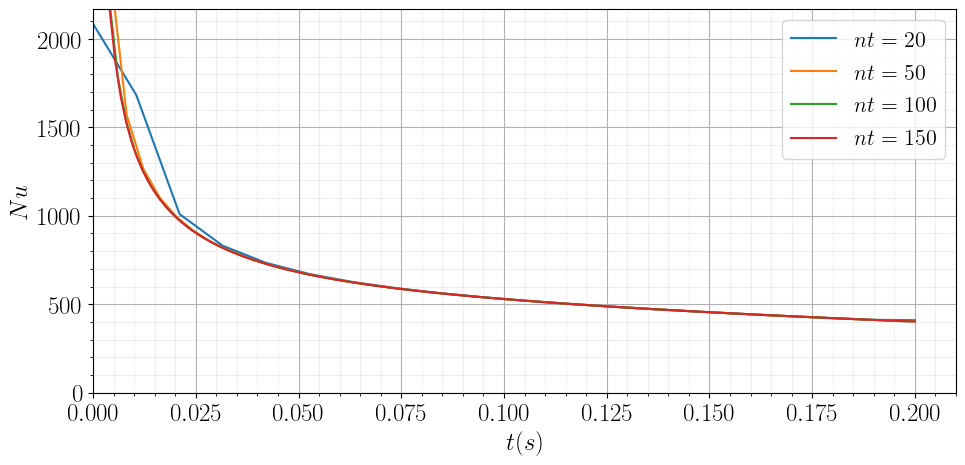

In [22]:
# import matplotlib.pyplot as plt
# from matplotlib import rc
# %matplotlib widget
# rc('figure', figsize=(10,5), dpi=120)

T_ref = TAnalytique(
    100,
    markers.Delta,
    markers.markers[0, 0],
    markers.markers[0, 1],
    lda_sur_rhocp=5.5 * 10**-2 / (7.03 * 10**4),
)
fig, ax = plt.subplots()
for nt in [20, 50, 100, 150]:
    tl, Tl_prof, Tliq, Tvap = compute_Tl_Tv(T_ref, 150, nt)
    Nu = compute_Nu(tl, Tliq, Tvap, phy_prop_no_conv)
    plot_Nusselt(tl, Nu, label=r"$nt = %i$" % nt, fig_num=fig.number)

if save_fig:
    fig.savefig(os.path.join(os.getcwd(), "../figures/sans_saut/T_fourier_conv_nt.pdf"))

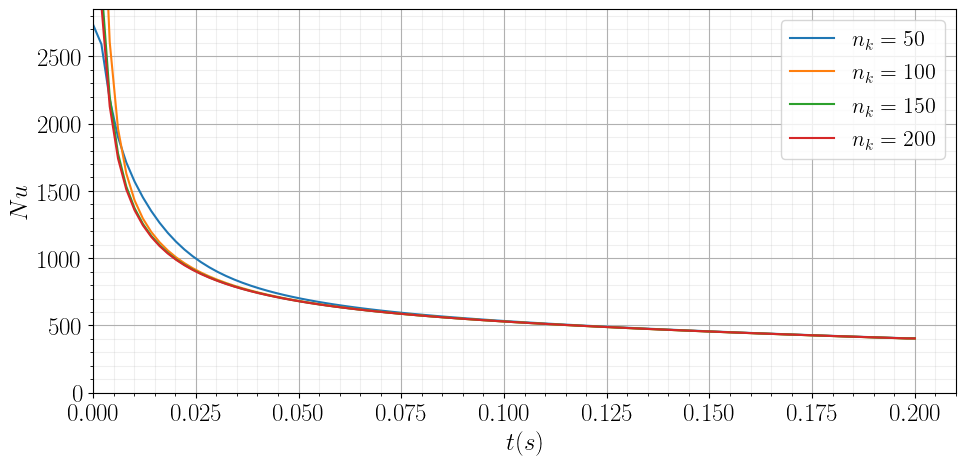

In [23]:
# import matplotlib.pyplot as plt
# from matplotlib import rc
# %matplotlib widget
# rc('figure', figsize=(10,5), dpi=120)

T_ref = TAnalytique(
    100,
    markers.Delta,
    markers.markers[0, 0],
    markers.markers[0, 1],
    lda_sur_rhocp=5.5 * 10**-2 / (7.03 * 10**4),
)
fig, ax = plt.subplots()
for nk in [50, 100, 150, 200]:
    tl, Tl_prof, Tliq, Tvap = compute_Tl_Tv(T_ref, nk, 100)
    Nu = compute_Nu(tl, Tliq, Tvap, phy_prop_no_conv)
    plot_Nusselt(tl, Nu, label=r"$n_k = %i$" % nk, fig_num=fig.number)

if save_fig:
    fig.savefig(os.path.join(os.getcwd(), "../figures/sans_saut/T_fourier_conv_nk.pdf"))

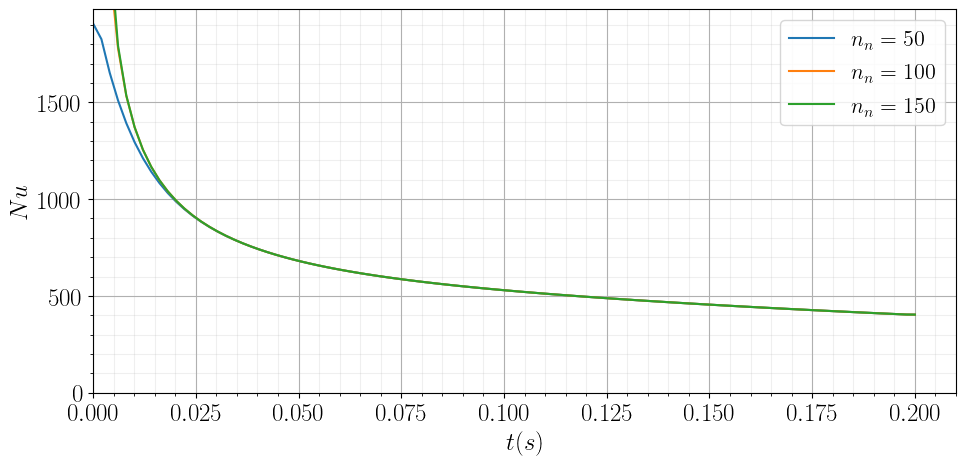

In [24]:
# import matplotlib.pyplot as plt
# from matplotlib import rc
# %matplotlib widget
# rc('figure', figsize=(10,5), dpi=120)

fig, ax = plt.subplots()
for nn in [50, 100, 150]:
    T_ref = TAnalytique(
        nn,
        markers.Delta,
        markers.markers[0, 0],
        markers.markers[0, 1],
        lda_sur_rhocp=5.5 * 10**-2 / (7.03 * 10**4),
    )
    tl, Tl_prof, Tliq, Tvap = compute_Tl_Tv(T_ref, 150, 100)
    Nu = compute_Nu(tl, Tliq, Tvap, phy_prop_no_conv)
    plot_Nusselt(tl, Nu, label=r"$n_n = %i$" % nn, fig_num=fig.number)

if save_fig:
    fig.savefig(os.path.join(os.getcwd(), "../figures/sans_saut/T_fourier_conv_nn.pdf"))

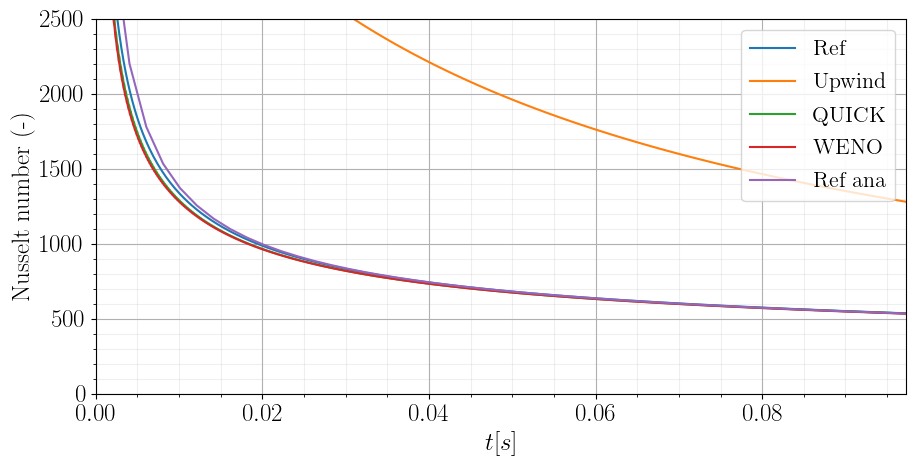

In [25]:
T_ref = TAnalytique(
    100,
    markers.Delta,
    markers.markers[0, 0],
    markers.markers[0, 1],
    lda_sur_rhocp=5.5 * 10**-2 / (7.03 * 10**4),
)
tl, Tl_prof, Tliq, Tvap = compute_Tl_Tv(T_ref, 150, 100)
Nu = compute_Nu(tl, Tliq, Tvap, phy_prop_no_conv)
plot_Nu.ax.plot(tl, Nu, label=r"Ref ana")
plot_Nu.ax.legend()
if save_fig:
    plot_Nu.fig.savefig(os.path.join(os.getcwd(), "../figures/sans_saut/Nu.pdf"))
plt.sca(plot_Nu.ax)
plt.show()